## Vision Systems in Agriculture (Part 1)

### Section 1: Image Representation (Images as Arrays)
We define how images are represented as arrays

#### 1.1 Import relevant Python packages

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Load and display an image

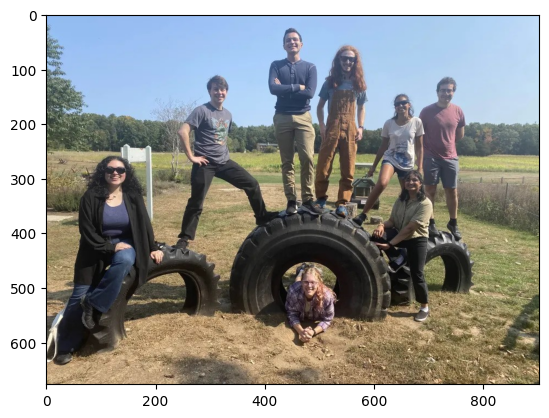

In [3]:
path_to_image = './img/class-crew.jpg'

# read the image from the directory
img = cv.imread(path_to_image)

# Convert from BGR (OpenCV's default) to RGB (Matplotlib's default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# display image
plt.imshow(img_rgb)
plt.show()

#### 1.3 Explore image properties

In [4]:
print('Image properties:')
print(f'Image type: {type(img_rgb)}')
print(f'Image shape: {img_rgb.shape}')
print(f'Image size: {img_rgb.size}')


Image properties:
Image type: <class 'numpy.ndarray'>
Image shape: (677, 903, 3)
Image size: 1833993


### Section 2: Basic Image Processing

1. Image cropping
2. Image resizing
3. Splitting image channels
4. Merging image channels
5. Converting to different color spaces
6. Pixel value distribution (image histogram)

1. Image cropping

Cropped image shape: (55, 50, 3)


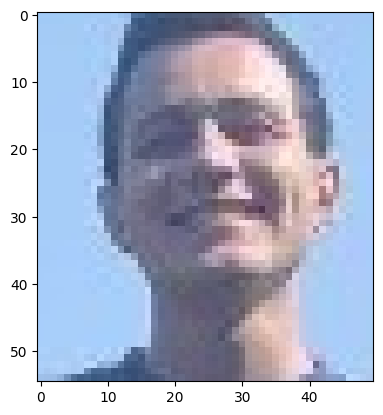

In [5]:
# TODO: Try to isolate Luke head!!

img_cropped = img_rgb[30:85, 425:475]
plt.imshow(img_cropped)
print(f'Cropped image shape: {img_cropped.shape}')

2. Resize image

Original image shape: (677, 903, 3)
Resized image shape: (10, 10, 3)


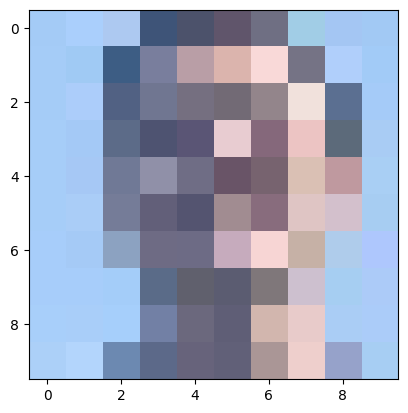

In [6]:
# TODO: Explore the cv.resize function


print(f'Original image shape: {img_rgb.shape}')
img_resize = cv.resize(img_cropped, (10,10))
print(f'Resized image shape: {img_resize.shape}')

plt.imshow(img_resize)

3. Splitting the image channels

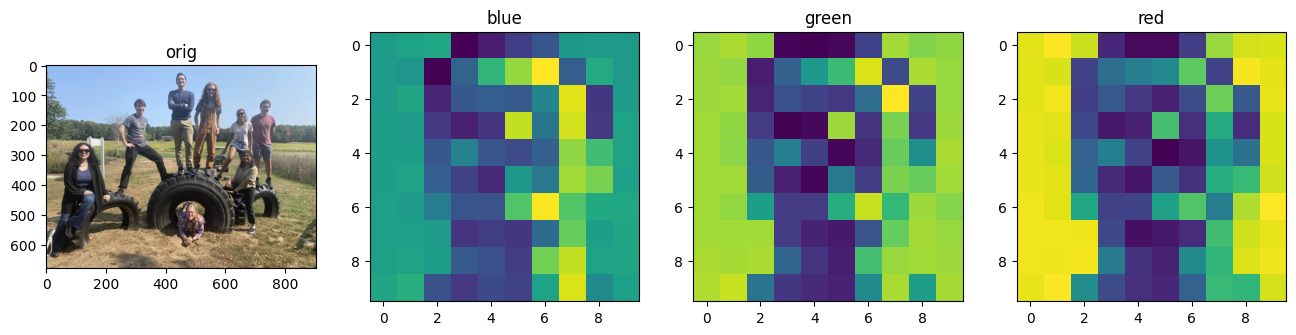

In [15]:
#TODO: RGB images have three (3) channels, use cv.split to isolate each channel and then display them all

channels = cv.split(img_resize)
titles = ("orig","blue","green","red")

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(channels)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels[i])
    plt.title(titles[i+1])

plt.show()

4. Merging image channels

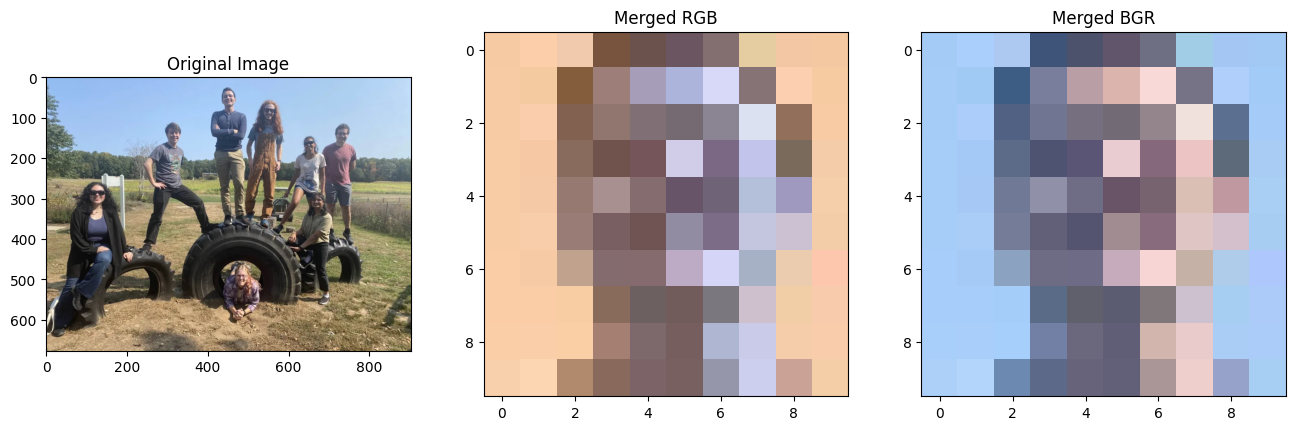

In [16]:
#TODO: What can be split can be merged. Use the cv.merge function to merge the individual channels together

merged_img_rgb = cv.merge([channels[2], channels[1], channels[0]],3)
merged_img_bgr = cv.merge([channels[0], channels[1], channels[2]],3)

#TODO: Does the order of merging matter? Find out!

titles = ['Original Image', 'Merged RGB', 'Merged BGR']
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.imshow(img_rgb), plt.title(titles[0])
plt.subplot(1,3,2)
plt.imshow(merged_img_rgb), plt.title(titles[1])
plt.subplot(1,3,3)
plt.imshow(merged_img_bgr), plt.title(titles[2])

plt.show()

5. Converting to different color spaces

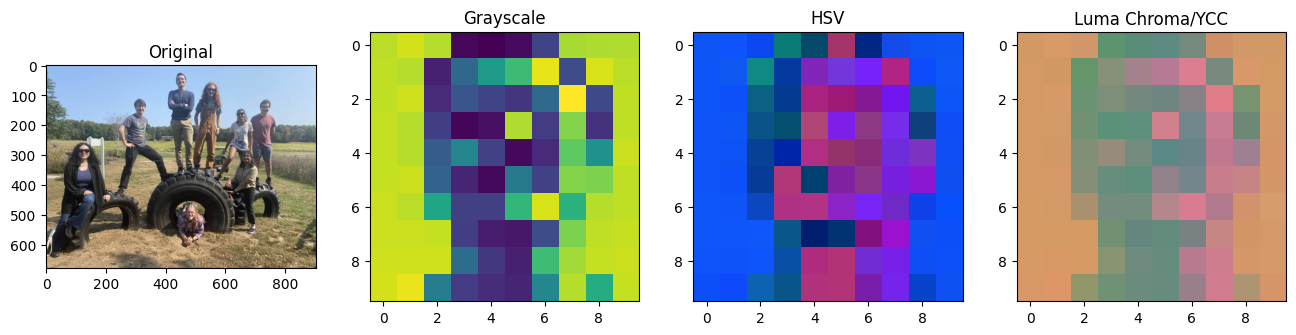

In [18]:
#TODO: Explore different color spaces. Plot the original image in at least 3 other color spaces

# Reference: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

img_grayscale = cv.cvtColor(img_resize, cv.COLOR_BGR2GRAY)
img_luma_chroma = cv.cvtColor(img_resize, cv.COLOR_BGR2YCrCb)
img_HSV = cv.cvtColor(img_resize, cv.COLOR_BGR2HSV)
diffColorSpaces = [img_grayscale, img_HSV, img_luma_chroma]
titles = ("Original", "Grayscale", "HSV", "Luma Chroma/YCC")

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(diffColorSpaces)):
    plt.subplot(1,4,i+2)
    plt.imshow(diffColorSpaces[i])
    plt.title(titles[i+1])

plt.show()

6. Pixel value distribution

Min and Max pixel values are: [89, 225]


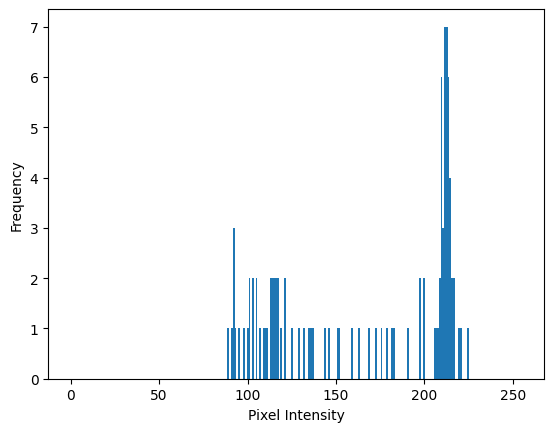

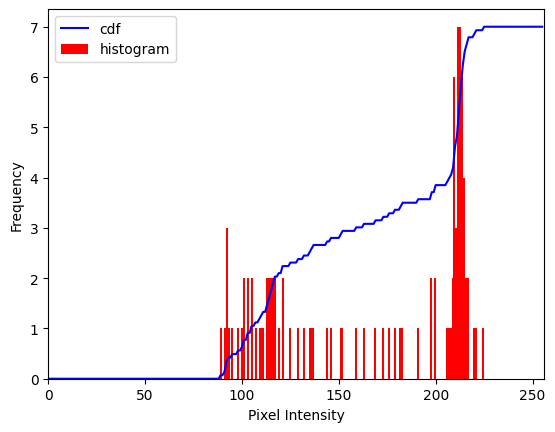

In [19]:
# TODO: Every pixel has a value (0, 255), let's explore the pixel value distribution

# TODO: 1. convert to grayscale
img_gray = img_grayscale


# TODO: 2. find the min and max pixel value
print(f'Min and Max pixel values are: [{np.min(img_gray)}, {np.max(img_gray)}]')


# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


### Section 3: Image Enhancement

1. Histogram equalization
2. Filtering

#### 1. Histogram equalization

Resource: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

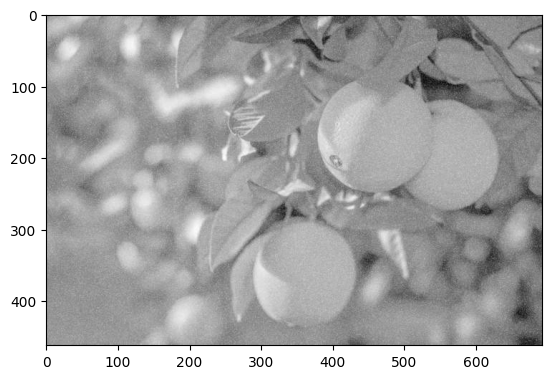

In [21]:
# import orange image file: 'orange.jpg'
img_gray = cv.imread('.//img//noisy-oranges.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(img_gray, cmap='gray')


Min and Max pixel values are: [30, 244]


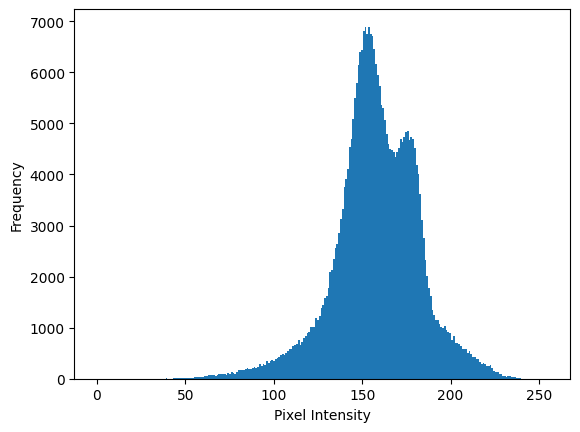

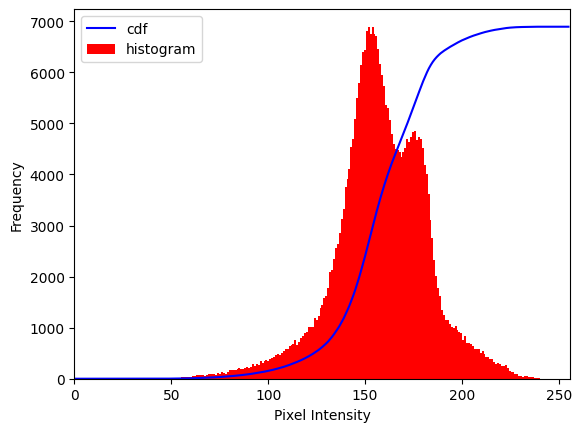

In [22]:
# TODO: Compute and plot the histogram and the cummulative distribution (use similar code as above)

# TODO: 2. find the min and max pixel value
print(f'Min and Max pixel values are: [{np.min(img_gray)}, {np.max(img_gray)}]')


# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


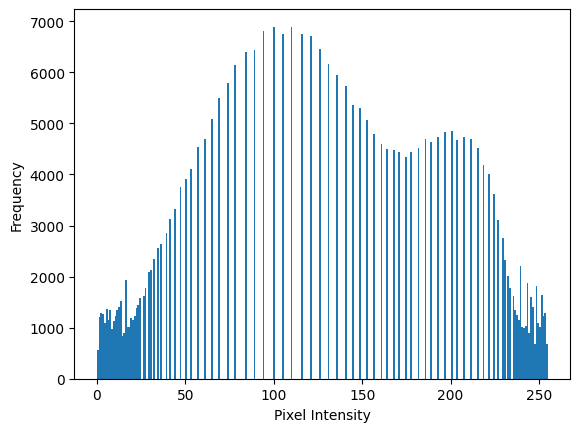

In [27]:
# TODO: Using the cv.equalizeHist, perform histogram equalization and plot the result
img_equalize = cv.equalizeHist(img_gray)

histSize = 256
histRange = (0, 255)
plt.hist(img_equalize.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

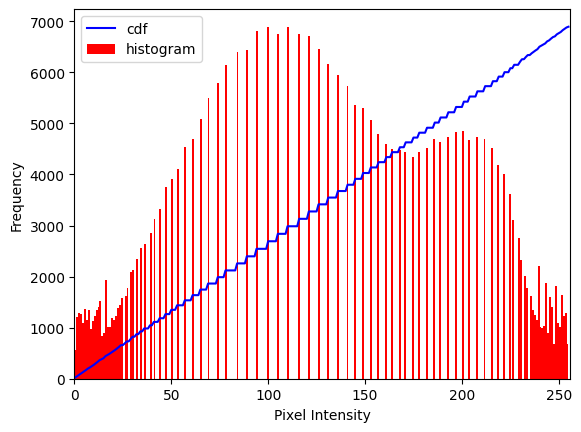

In [28]:
# TODO: Compute and plot the histogram and the cummulative distribution of the equalized image (use similar code as above)

# Can you spot the difference??

hist, bins = np.histogram(img_equalize.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_equalize.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


#### 2. Image Filtering (smoothing)


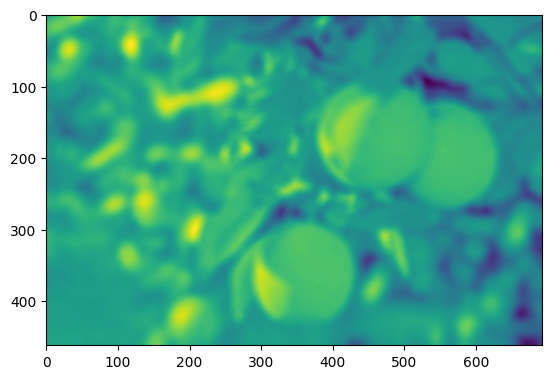

In [69]:
# Resource: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html 
img = cv.imread('.//img//noisy-oranges.jpg',cv.IMREAD_GRAYSCALE)
# plt.imshow(img)

# TODO: Play around with different filters to get a good outcome
blur = cv.bilateralFilter(img,17,1000,1000)
# median = cv.medianBlur(img,5)
# plt.imshow(img)
# plt.imshow(median)
plt.imshow(blur)


### Section 4. Pixel-wise Image Segmentation

1. Monochrome image classification (manual approach)
2. Monochrome image classification (adaptive approach and Otsu)
3. Color image classification


1. Monochrome image classification (manual approach)

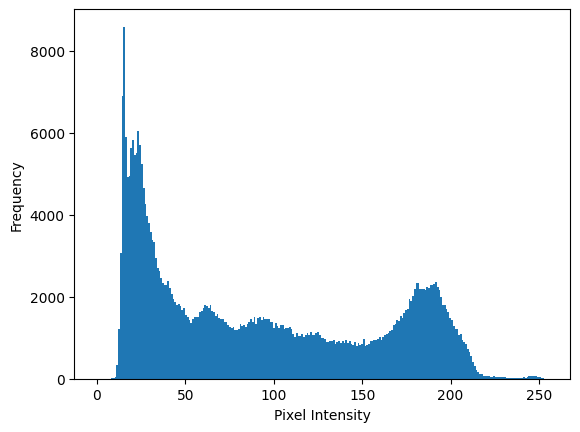

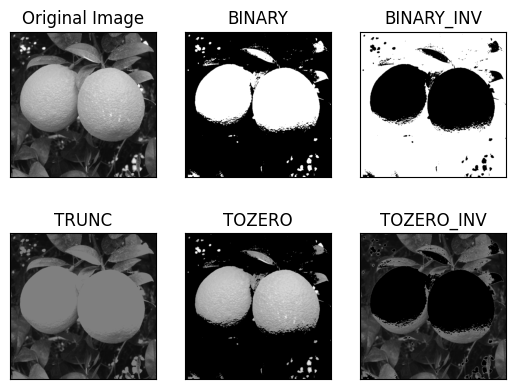

In [77]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Import orange.jpg 
img_orange = cv.imread('.//img//orange.jpg',cv.IMREAD_GRAYSCALE)

# plt.imshow(img_orange)
# TODO: Inspect the pixel value distribution to determine a good threshold
plt.hist(img_orange.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
# TODO: Use cv.threshold to apply a binary threshold on the image and plot the outcome 
ret,thresh1 = cv.threshold(img_orange,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_orange,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img_orange,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img_orange,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img_orange,127,255,cv.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_orange, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()


2. Monochrome image classification (adaptive approach and Otsu)

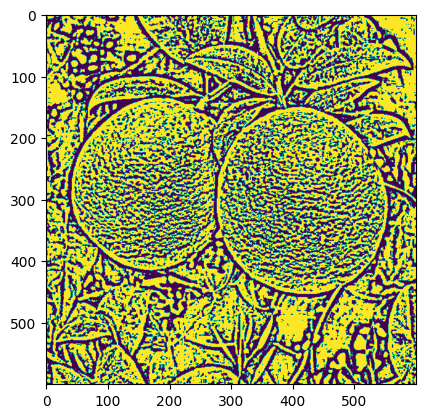

In [78]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use cv.adaptiveThreshold to apply a binary threshold on the image and plot the outcome

th2 = cv.adaptiveThreshold(img_orange,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
  

plt.imshow(th2)

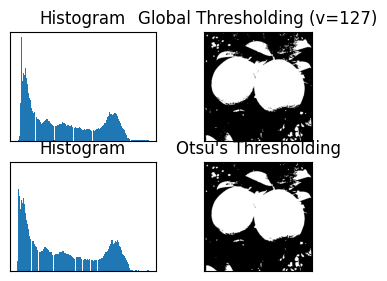

In [80]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use the otsu method to apply a binary threshold on the image and plot the outcome
ret2,th2 = cv.threshold(img_orange,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img_orange,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img_orange, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(2):
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
# TODO: What are your observations?

3. Color image classification

Resource: https://realpython.com/python-opencv-color-spaces/ 

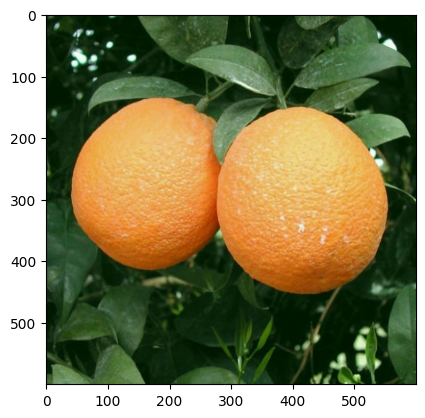

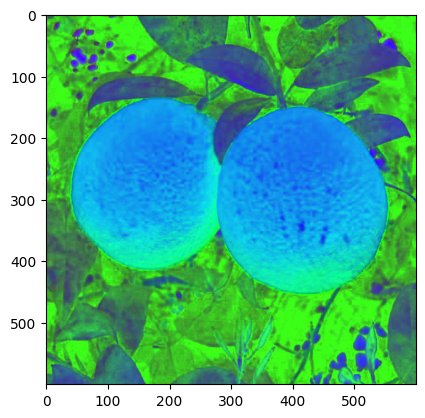

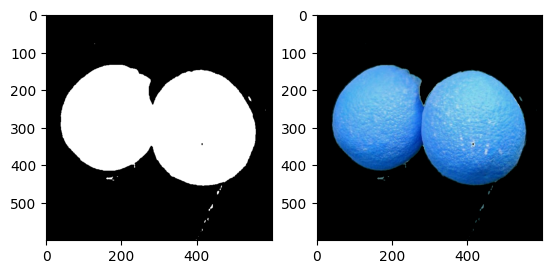

In [113]:
# TODO: Follow the resource above to define a color mask
orange = cv.imread('.//img//orange.jpg')
colored_orange = cv.cvtColor(orange, cv.COLOR_BGR2RGB)
plt.imshow(colored_orange)
plt.show()
hsv_orange = cv.cvtColor(colored_orange, cv.COLOR_RGB2HSV)
plt.imshow(hsv_orange)
plt.show()
mask = cv.inRange(hsv_orange, (0,0,0), (30, 255, 255))
result_orange = cv.bitwise_and(orange, orange, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_orange)
plt.show()

In [ ]:
# TODO: Could you apply the Otsu approach to this as well? Give it a try.


In [ ]:
# TODO: Morphological operations are super helpful in denoising and rounding out your mask.
# Resource: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html



4. Bounding box and segmentation visualization

In [ ]:
# TODO: Use a combination of cv.findContours, cv.drawContours and OpenCV's bitwise operations to obtain a bounding box and segmentation visualization as in the image below.


## Example Solution

<img src=".\img\solution1.png" width="800">

<img src=".\img\solution2.png" width="400">


#### TODO
1. Generate an object detection solution for "orange.jpg" AND either "orange-2.jpg" or "orange-3.jpg" 
2. Generate a plot showing the prediction vs the ground truth for each image
3. Calculate the evaluation metric (mean average precision) for each image

In [ ]:
from helpers import get_ground_truth_ann, calculate_map

# Our goal here is to evaluate the segmentation and object detection prediction against ground truth data for the image

# TODO: Use cv.boundingRect to get the bounding box info from the contour you generated above

# prediction_bbox = []
# for contour in contours:
#     x, y, w, h = cv.boundingRect(contour)
#     prediction_bbox.append([x, y, x + w, y + h])

# Here we have provided a helper function to extract the ground truth bbox for the images
# image_name = 'example-image.jpg'
# ground_truth_bbox = get_ground_truth_ann(image_name=image_name, show=False)

# print(f'ground_truths = {ground_truth_bbox}')
# print(f'predictions = {prediction_bbox}')


# TODO: plot the results
# img_bbox = img.copy()

# for gt in ground_truth_bbox:
#     gt = [int(v) for v in gt]
#     cv.rectangle(img_bbox, (gt[0], gt[1]), (gt[2], gt[3]), (0, 255, 0), 2)

# for pd in prediction_bbox:
#     pd = [int(v) for v in pd]
#     cv.rectangle(img_bbox, (pd[0], pd[1]), (pd[2], pd[3]), (255, 0, 0), 2)


# plt.imshow(img_bbox)
# plt.title("Ground truth vs predicted Bbox")


In [ ]:
# TODO: Use the calculate_map helper function to calculate the average precision of your object detection pipeline
# mAP = calculate_map(ground_truth_bbox, prediction_bbox, iou_threshold=0.7)
# print(mAP)